In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
sys.path.append("/data/user/tchau/Sandbox/GC_OscNext/Spectra")
from Jfactor import *

#Change the resolution of the plots
plt.rcParams['figure.dpi']= 200
plt.rcParams.update({'font.size': 16})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


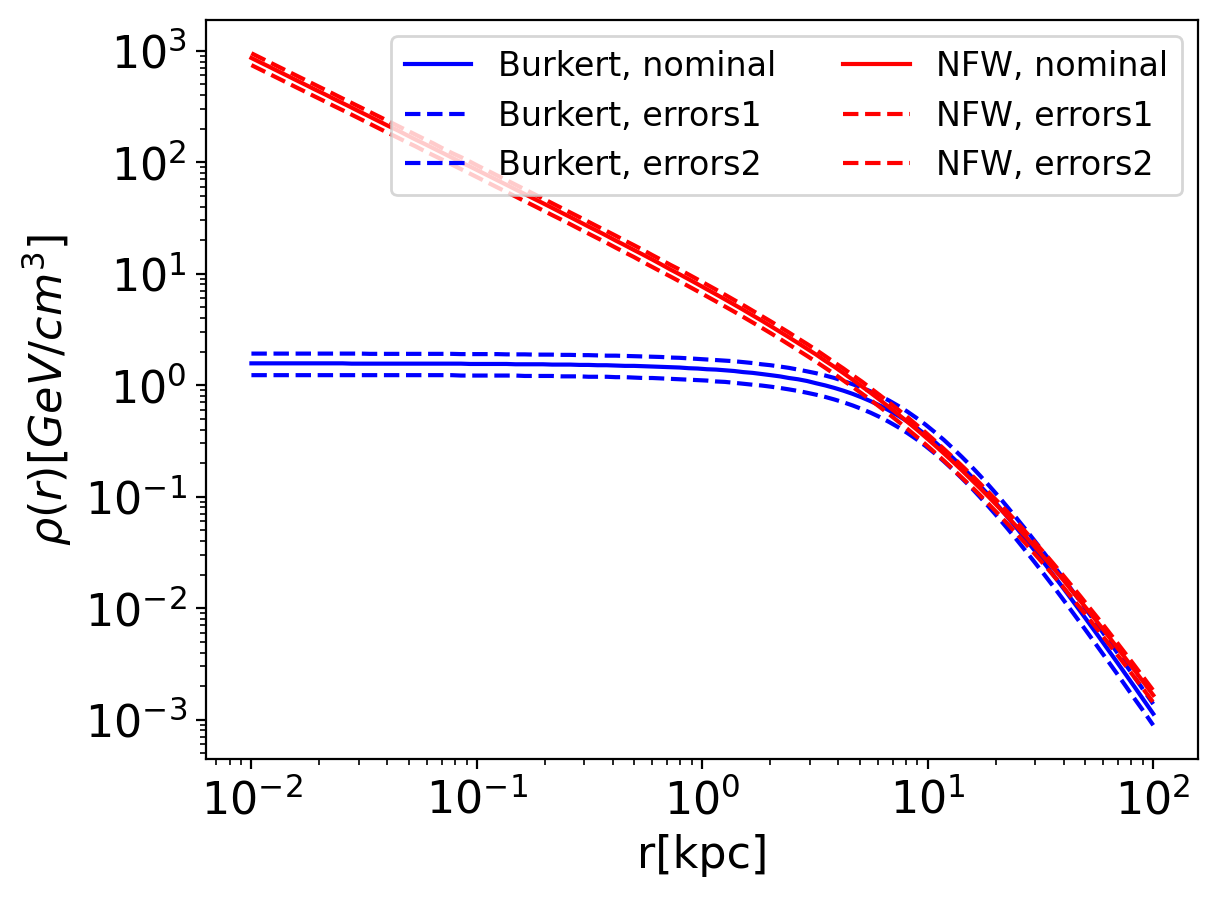

In [9]:
# Density from Clumpy:
psi = np.linspace(0.,180,80)
profile=["Burkert", "NFW"]
error=["errors1", "errors2"]
MyJ = Jf(process='ann')
# Labels + color for the plot:
colors = {"NFW":'red', "Burkert":'blue'}
ls = {"errors1":'--', "errors2":'--'}
for pr in profile:
    MyJ.profile = pr
    J_Clumpy = MyJ.profile_Clumpy()
    plt.plot(J_Clumpy["r"], J_Clumpy["rho"], color=colors[pr], label=f'{pr}, nominal')
    for e in error:        
        J_Clumpy = MyJ.profile_Clumpy(errors=e)
        plt.plot(J_Clumpy["r"], J_Clumpy["rho"], color=colors[pr], label=f'{pr}, {e}', linestyle=ls[e])


    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r[kpc]')
plt.ylabel(r'$\rho(r)[GeV/cm^{3}]$')
# plt.plot(8, 0.4, marker='+', color='black')
plt.legend(ncol=2, fontsize=12, loc=1)
# plt.legend(bbox_to_anchor=(0.685, 0.5), ncol=2)


Text(0, 0.5, '$J(\\psi)[GeV \\cdot cm^{-5} \\cdot sr^{-1}]$')

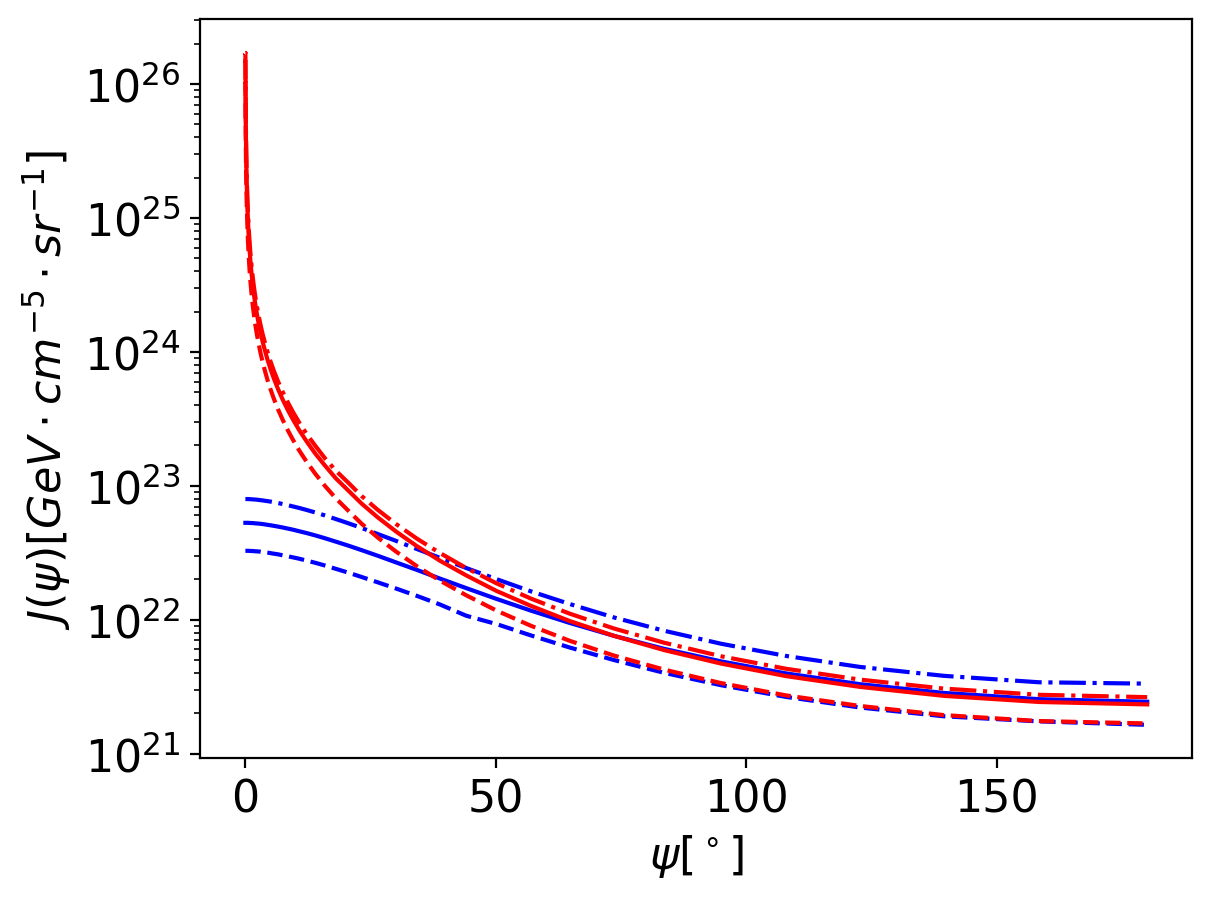

In [10]:
# Jfactor from Clumpy:
psi = np.linspace(0.,180,80)
profile=["Burkert", "NFW"]
error=["errors1", "errors2"]
MyJ = Jf(process='ann')
# Labels + color for the plot:
colors = {"NFW":'red', "Burkert":'blue'}
ls = {"errors1":'-.', "errors2":'--'}
lb = {"errors1":'error +', "errors2":'error -'}

for pr in profile:
    MyJ.profile = pr
    J_Clumpy = MyJ.Jfactor_Clumpy()
    plt.plot(J_Clumpy["psi"], J_Clumpy["J"], color=colors[pr], label=f'Clumpy - {pr}, nominal')
    for e in error:        
        J_Clumpy = MyJ.Jfactor_Clumpy(errors=e)
        plt.plot(J_Clumpy["psi"], J_Clumpy["J"], color=colors[pr], label=f'Clumpy - {pr}, {lb[e]}', linestyle=ls[e])

    
# plt.yscale('log')
plt.semilogy()
plt.xlabel(r'$\psi[^\circ]$')
plt.ylabel(r'$J(\psi)[GeV \cdot cm^{-5} \cdot sr^{-1}]$')
# plt.legend(bbox_to_anchor=(1.1, 1.05))